In [1]:
from audiointerp.dataset.esc50 import ESC50dataset
from audiointerp.model.cnn14 import TransferCnn14
from audiointerp.fit import Trainer, plot_learning_curves
from audiointerp.processing.spectrogram import LogSTFTSpectrogram, plot_spec
import torch.nn as nn
import torch.optim as optim
import torchaudio.transforms as T_audio
import torch

In [2]:
root_dir = "/root/ESC50"
# root_dir = "/home/yuliya/ESC50"
sr = 32000
train_folds = [1, 2, 3]
valid_folds = [4]
test_folds = [5]

In [3]:
n_fft = 1024
hop_length = 320
win_length = 1024
top_db = None

In [4]:
feature_extractor = LogSTFTSpectrogram(
    n_fft=n_fft, win_length=win_length, hop_length=hop_length, top_db=top_db,
    return_phase=False, return_full_db=False
)

In [5]:
feature_augs = nn.Sequential(
    T_audio.FrequencyMasking(20),
    T_audio.TimeMasking(20)
)

In [6]:
train_data = ESC50dataset(root_dir=root_dir, sr=sr, folds=train_folds, normalize="peak", feature_extractor=feature_extractor, feature_augs=feature_augs)
valid_data = ESC50dataset(root_dir=root_dir, sr=sr, folds=valid_folds, normalize="peak", feature_extractor=feature_extractor)
test_data = ESC50dataset(root_dir=root_dir, sr=sr, folds=test_folds, normalize="peak", feature_extractor=feature_extractor)

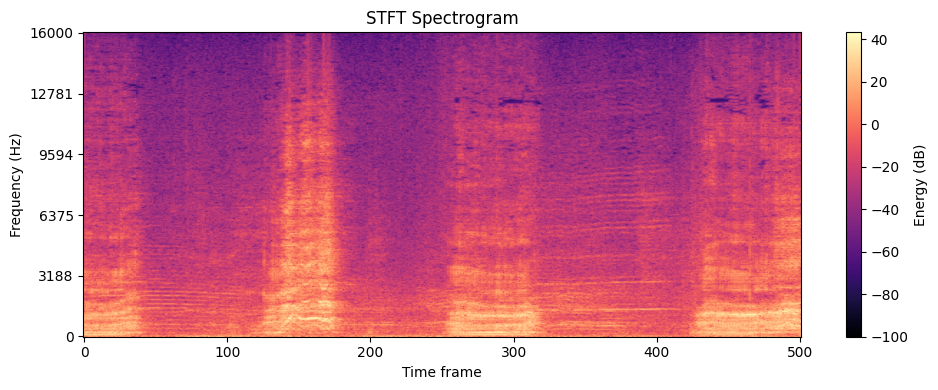

In [7]:
plot_spec(test_data[0][0], sample_rate=sr, is_mel=False)

In [8]:
train_loader_kwargs = {"batch_size": 32, "shuffle": True}
valid_loader_kwargs = {"batch_size": 32, "shuffle": False}
test_loader_kwargs = {"batch_size": 32, "shuffle": False}

In [9]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cuda:1")
model_cls = TransferCnn14
model_kwargs = {"num_classes": 50, "num_bins": 513}
model_pretrain_weights_path = "weights/Cnn14_mAP=0.431.pth"

optimizer_cls = optim.Adam
optimizer_kwargs = {"lr": 1e-3}

criterion_cls = nn.CrossEntropyLoss
use_mixup = True
mixup_alpha = 0.2

In [10]:
model_trainer = Trainer(
    model_cls=model_cls,
    train_data=train_data,
    train_loader_kwargs=train_loader_kwargs,
    criterion_cls=criterion_cls,
    optimizer_cls=optimizer_cls,
    model_kwargs=model_kwargs,
    model_pretrain_weights_path=model_pretrain_weights_path,
    optimizer_kwargs=optimizer_kwargs,
    device=device,
    valid_data=valid_data,
    valid_loader_kwargs=valid_loader_kwargs,
    test_data=test_data,
    test_loader_kwargs=test_loader_kwargs,
    use_mixup=use_mixup,
    mixup_alpha=mixup_alpha
)

Random seed set to: 42


In [11]:
train_losses, train_accs, val_losses, val_accs, test_loss, test_acc = model_trainer.train(num_epochs=20, save_weights_path="logstft_cnn14.pth")

Epoch:   5%|███▊                                                                         | 1/20 [01:13<23:17, 73.56s/it]

Train Loss: 3.5003, Train Acc: 0.1273
Valid Loss: 2.4060, Valid Acc: 0.3850


Epoch:  10%|███████▋                                                                     | 2/20 [02:26<22:02, 73.46s/it]

Train Loss: 2.4022, Train Acc: 0.3849
Valid Loss: 1.7069, Valid Acc: 0.5550


Epoch:  15%|███████████▌                                                                 | 3/20 [03:40<20:49, 73.51s/it]

Train Loss: 1.9612, Train Acc: 0.5072
Valid Loss: 1.4567, Valid Acc: 0.5975


Epoch:  20%|███████████████▍                                                             | 4/20 [04:54<19:36, 73.54s/it]

Train Loss: 1.8829, Train Acc: 0.5512
Valid Loss: 1.2226, Valid Acc: 0.7025


Epoch:  25%|███████████████████▎                                                         | 5/20 [06:07<18:23, 73.55s/it]

Train Loss: 1.5701, Train Acc: 0.6256
Valid Loss: 3.7660, Valid Acc: 0.5400


Epoch:  30%|███████████████████████                                                      | 6/20 [07:21<17:09, 73.51s/it]

Train Loss: 1.2550, Train Acc: 0.7038
Valid Loss: 0.9231, Valid Acc: 0.7575


Epoch:  35%|██████████████████████████▉                                                  | 7/20 [08:34<15:55, 73.51s/it]

Train Loss: 1.2407, Train Acc: 0.7583
Valid Loss: 1.0401, Valid Acc: 0.7100


Epoch:  40%|██████████████████████████████▊                                              | 8/20 [09:48<14:41, 73.50s/it]

Train Loss: 1.1966, Train Acc: 0.7590
Valid Loss: 0.9754, Valid Acc: 0.7275


Epoch:  45%|██████████████████████████████████▋                                          | 9/20 [11:01<13:28, 73.54s/it]

Train Loss: 0.8504, Train Acc: 0.8362
Valid Loss: 0.9000, Valid Acc: 0.7650


Epoch:  50%|██████████████████████████████████████                                      | 10/20 [12:15<12:15, 73.58s/it]

Train Loss: 1.1800, Train Acc: 0.7684
Valid Loss: 0.8593, Valid Acc: 0.7775


Epoch:  55%|█████████████████████████████████████████▊                                  | 11/20 [13:28<11:01, 73.54s/it]

Train Loss: 1.1582, Train Acc: 0.7682
Valid Loss: 0.8635, Valid Acc: 0.7700


Epoch:  60%|█████████████████████████████████████████████▌                              | 12/20 [14:42<09:48, 73.52s/it]

Train Loss: 1.0148, Train Acc: 0.8229
Valid Loss: 1.4582, Valid Acc: 0.7350


Epoch:  65%|█████████████████████████████████████████████████▍                          | 13/20 [15:55<08:34, 73.57s/it]

Train Loss: 0.8725, Train Acc: 0.8512
Valid Loss: 0.7174, Valid Acc: 0.8250


Epoch:  70%|█████████████████████████████████████████████████████▏                      | 14/20 [17:09<07:21, 73.58s/it]

Train Loss: 1.0224, Train Acc: 0.8334
Valid Loss: 2.5362, Valid Acc: 0.6175


Epoch:  75%|█████████████████████████████████████████████████████████                   | 15/20 [18:23<06:07, 73.56s/it]

Train Loss: 1.0154, Train Acc: 0.8070
Valid Loss: 0.6324, Valid Acc: 0.8350


Epoch:  80%|████████████████████████████████████████████████████████████▊               | 16/20 [19:36<04:54, 73.56s/it]

Train Loss: 0.9258, Train Acc: 0.8323
Valid Loss: 0.6929, Valid Acc: 0.8075


Epoch:  85%|████████████████████████████████████████████████████████████████▌           | 17/20 [20:50<03:40, 73.57s/it]

Train Loss: 1.0035, Train Acc: 0.8432
Valid Loss: 0.5745, Valid Acc: 0.8575


Epoch:  90%|████████████████████████████████████████████████████████████████████▍       | 18/20 [22:04<02:27, 73.64s/it]

Train Loss: 0.8529, Train Acc: 0.8636
Valid Loss: 0.6039, Valid Acc: 0.8475


Epoch:  95%|████████████████████████████████████████████████████████████████████████▏   | 19/20 [23:18<01:13, 73.75s/it]

Train Loss: 1.1971, Train Acc: 0.7814
Valid Loss: 0.7713, Valid Acc: 0.8025


Epoch: 100%|████████████████████████████████████████████████████████████████████████████| 20/20 [24:31<00:00, 73.59s/it]


Train Loss: 0.8926, Train Acc: 0.8565
Valid Loss: 0.6294, Valid Acc: 0.8525
Best val Acc: 0.8575
Модель сохранена в logstft_cnn14.pth
Test Loss: 0.8493, Test Acc: 0.7800


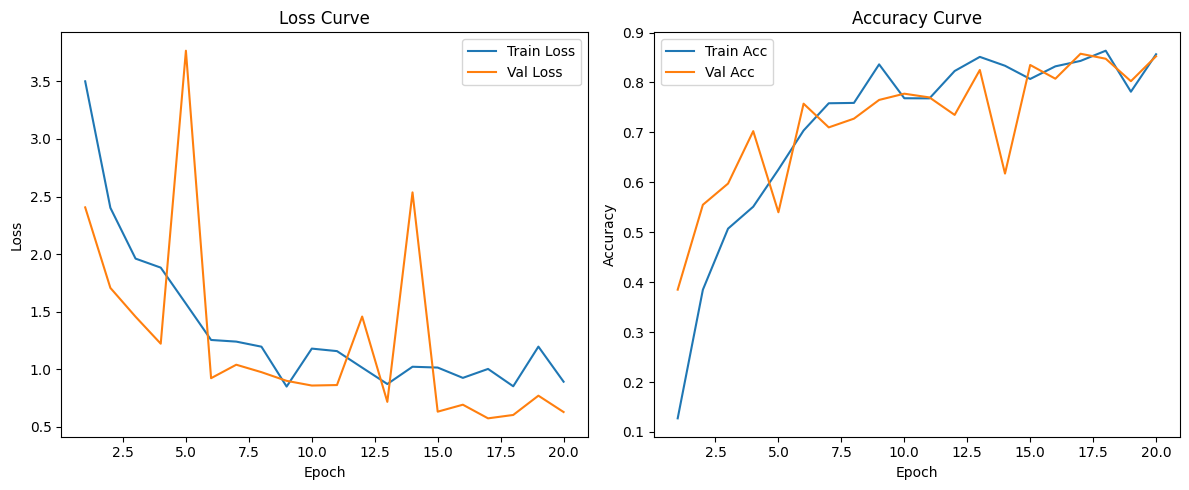

In [12]:
plot_learning_curves(train_losses=train_losses, train_accs=train_accs, val_losses=val_losses, val_accs=val_accs)

In [13]:
model_trainer.model.load_state_dict(torch.load("logstft_cnn14.pth"))

<All keys matched successfully>

In [14]:
model_trainer.test()

Test Loss: 0.8493, Test Acc: 0.7800


(0.8493275141716004, 0.78)